<a href="https://colab.research.google.com/github/eashabibi/FML/blob/main/K_Nearest_Neighbor_on_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Nearest Neighbours 
  * K-NN is non-parametric and lazy learning algorithm.
  * Non-parametric means there is no assumption for underlying data distribution (model structure determined from dataset).
  * Here K is hyperparameter(given by users).
  * It does not need any training data points for model generation.All training data is used in testing phase --makes training faster and testing slower(because given points for training is not used just stores,only used when only new data prediction) and costlier.



# K-NN works:
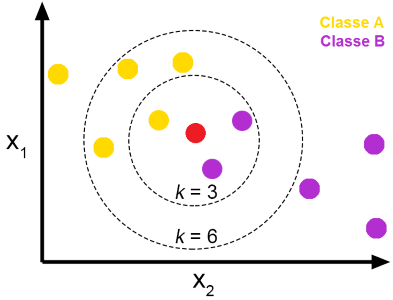
* K=3 , new data point(red) can be classified based on nearnest 3 datapoints (2 pink,1 yellow) as max 2 pink so red point is belongs to class-B.........for K=6 nearnest 6 data points are considered (4 yellow,2 pink) then new data point belongs to class-A
* To classify k into any one class a distance metrix is used..one of popular metrix is "Euclidean distance"--to calculate distance between new data point and existing data ponts.

In [2]:
#import the packages

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Iris dataset:**

 The Iris flower dataset is a multivariate dataset that contains measurements of the sepal length, sepal width, petal length, and petal width for 150 iris flowers, with 50 samples for each of the three different species of iris (setosa, versicolor, and virginica).

In [19]:
type(iris)

sklearn.utils._bunch.Bunch

In [3]:
# loading dataset
iris=load_iris()

In [4]:
# with first five rows of dataset being used as test set.
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
# "iris.feature_names" is a Python list contains names of four features.that are present in  Iris flower dataset.
# used to label the columns of the dataset 
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# "iris.target" is a NumPy array that contains target variable for the well-known Iris flower dataset.
#  goal --- predict species of an iris flower based on its sepal length, sepal width, petal length, and petal width measurements.
#  represents species of each iris flower observation using integer labels.
#  integer label 0-- setosa species, 
#  label 1 -- versicolor species, 
#  label 2 --virginica species.
iris.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# "iris.target_names" is one-dimensional NumPy array contains three string values, representing three different species of iris in the dataset: 'setosa', 'versicolor', and 'virginica'.
# pre-defined attribute in scikit-learn that contains the names of the target.
# Also --maps the integer label predicted by the model to the corresponding species name.
# EX: to map predicted integer label (which is 0 in this case) to corresponding species name ('setosa').
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [8]:
# "iris.data" is two-dimensional array with 150 rows (one for each observation) and 4 columns (one for each feature).
# "iris.target" is a one-dimensional array with 150 integer values, where each value represents the species of the corresponding iris flower observation.

print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
# shows 150 rows and 4 coloumns
iris.data.shape

(150, 4)

In [10]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=41)


In [20]:
# X_train contains a random subset of 80% of the rows of the original iris dataset, which is used for training a machine learning model. X_test contains the remaining 20% of the rows, which are used for testing the model's performance on unseen data.
# It is 2d---(rows,coloumns)
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [12]:
# y_train contains a random subset of 80% of the target variable values from the original iris dataset, which is used for training a machine learning model. y_test contains the remaining 20% of the target variable values, which are used for testing the model's performance on unseen data.
# there is only one target variable in the iris dataset (i.e., the species of the iris flower), the shape of both y_train and y_test arrays have only one dimension.

y_train.shape, y_train.shape

((120,), (120,))

# Train The model

In [13]:
# KNeighborsClassifier() class from scikit-learn is used to create a KNN classifier object.
# with n_neighbors=1 indicating that the classifier should consider only the nearest neighbor of a given data point when making predictions.
# fit() method of KNN classifier object is called, with X_train and y_train as its arguments. This trains the KNN classifier on training data, allowing it to learn relationship between features (contained in X_train) and target variable (contained in y_train).

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)     
     

KNeighborsClassifier(n_neighbors=1)

In [14]:
# After training, KNN classifier is ready to make predictions on new, unseen data.
y_pred = knn.predict(X_test)

In [15]:
# "score()" method of classifier can be used to evaluate its performance on both training and testing data.
#  returns accuracy score of the KNN classifier on training data.it calculates the proportion of correctly classified samples in the training set

knn.score(X_train, y_train), knn.score(X_test, y_test)


(1.0, 0.9)

# Test The Model

In [16]:
#  KNN classifier is now trained with n_neighbors=5, which means that it  consider five nearest neighbors of each data point when making predictions.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_train, y_train), knn.score(X_test, y_test))

0.9833333333333333 0.9666666666666667


  KNN classifier with n_neighbors=5 is performing very well on both the training and testing data.
  
  This suggests that the model is fitting the training data well and capturing the underlying patterns in the data.

In [17]:
confusion_matrix(y_test, y_pred)

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 10]])

Number of samples that were correctly predicted for each class are:

Class 0: 9

Class 1: 10

Class 2: 10

In [18]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.91      0.95        11
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

